# Goal: Clean up the raw data 

The goal of this notebook is to clean up the original data of the spider activity by
<ol>
<li>Remove the incomplete days and useless columns in the raw data</li>
<li>Plot full raster plots for each spider, visually inspect the result and delete unreliable data</li>
<li>Split the data into two dataframes according the LD and DD phases and save in .csv files for future use</li>
</ol>

## Import Relevant Packages

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Import Relevant Functions

In [63]:
#The length of a day in mins
one_day=24*60

#Download file and remove incomplete day
#file_name: a string of file name of the data
#column: a list of names assigned to the columns
#Return a cleaned dataframe of the spider activity. The incomplete days removed and date and time info converted into Date-Time Index
def download_clean(file_name,column):
    
    data=pd.read_csv(file_name,sep='\t',header=None,names=column)
    
    #Change the index into Date_Time
    data.index=pd.to_datetime(data.Date+' '+data.Time)
    
    #Group by days and remove the incomplete days
    dates=data.groupby('Date')
    length_of_day=dates.size()
    number_of_day=len(dates)
    for i in range(0,number_of_day):
        if length_of_day[i] !=one_day:
            data=data[data.Date!=length_of_day.index[i]]
            
    return data

#Split the light-dark period and the dark-dark period
#data: a dataframe of the spider activity
#Return two dataframes of light-dark period and dark-dark period
def Split_LD_DD(data):
    
    #Separate the period in constant dark
    Sum_light=data.groupby('Date')['lights'].sum()
    
    #Find days in light-dark and constant dark and save the date respectively in the list
    ldgroup=(Sum_light.index[Sum_light!=0]).tolist()
    ddgroup=(Sum_light.index[Sum_light==0]).tolist()    
    
    #Find the dates of LD and DD experiment and split the data frame into LD and DD group
    LD=data[data['Date'].isin(ldgroup)]
    DD=data[data['Date'].isin(ddgroup)]
    
    return LD, DD

#Plot the raster plot of spiders' LD and DD period
#data: a dataframe of the spider activity
#Spider: the specific spider to be plotted
#FileName: the name of the .png file of each spider's raster plot
#Return the raster plot of each spider
def Plot_RasterPlot(data,Spider,FileName):
    
    #The number of days included in the parameter-data
    number_of_days=int(len(data)/one_day)
    
    #Set up subplots and change the figure size to fit the raster plot
    fig,ax=plt.subplots(number_of_days,1,sharex=True,figsize=(12,12))
    
    #Loop through days and plot daily activity as a subplot
    for i in range(0,number_of_days):
        data=pd.DataFrame(df.iloc[0+i*one_day:one_day+i*one_day])
        ax[i].plot(data.Time,data[Spider])
        
        #Add gray shading to dark portion(light = 0)
        light=True
        for t in data.index:
            if data.lights[t]==0:
                if light:
                    light=False
                    start=t
            else:
                if not light:
                    light=True
                    ax[i].axvspan(data.Time[start],data.Time[t], alpha=0.3, color='gray')
        if not light:
            ax[i].axvspan(data.Time[start],data.Time[t], alpha=0.3, color='gray')
        
        #Set the date as the y-axis label of the plots
        ax[i].set_ylabel(data.Date[1])
        
    #The number of ticks in x-axis and the length between each point
    number_of_points=6
    len_between_points=24*60/number_of_points
    
    #Define the range of the x-axis and change the number of ticks on x-axis
    plt.xticks(range(0,int(one_day)+1,int(len_between_points)))
    plt.xlim(0,one_day)
    
    #Save the figure as a .png document
    plt.savefig(FileName)
    
    return plt.show()

## Clean the original data

In [60]:
#The column names assigned to the dataframe after visual inspection
colum=['Number','Date','Time','lights','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
         's12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22',
         's23','s24','s25','s26','s27','s28','s29','s30','s31','s32']

#Transform the original .txt file into a dataframe and add column names
df=download_clean('Latrodectus.txt',colum)

#Delete the useless columns after the visually inspection of raw data
df.drop(['Number'],axis=1,inplace=True)

df.head()

Date     Time  lights  s1  s2  s3  s4  s5  s6  s7  \
2017-09-22 00:00:00  22-Sep-17  0:00:00       0  15   0   0   0   0   0   8   
2017-09-22 00:01:00  22-Sep-17  0:01:00       0   0   0   0   0   0   0   3   
2017-09-22 00:02:00  22-Sep-17  0:02:00       0   0   0   0   0   0   0   6   
2017-09-22 00:03:00  22-Sep-17  0:03:00       0   2   0   0   0   0   0   7   
2017-09-22 00:04:00  22-Sep-17  0:04:00       0   3   0   0   0   0   0   8   

                     ...  s23  s24  s25  s26  s27  s28  s29  s30  s31  s32  
2017-09-22 00:00:00  ...    0    0    0    0    0    0    0   43    0    0  
2017-09-22 00:01:00  ...    0    0    0    0    0    0    0   50    0    0  
2017-09-22 00:02:00  ...    0    0    0    0    0    0    0   55    0    0  
2017-09-22 00:03:00  ...    0    0    0    0    0    0    0   52    0    0  
2017-09-22 00:04:00  ...    0    0    0    0    0    0    0   57    0    0  

[5 rows x 35 columns]

## Make full raster plots for each spider

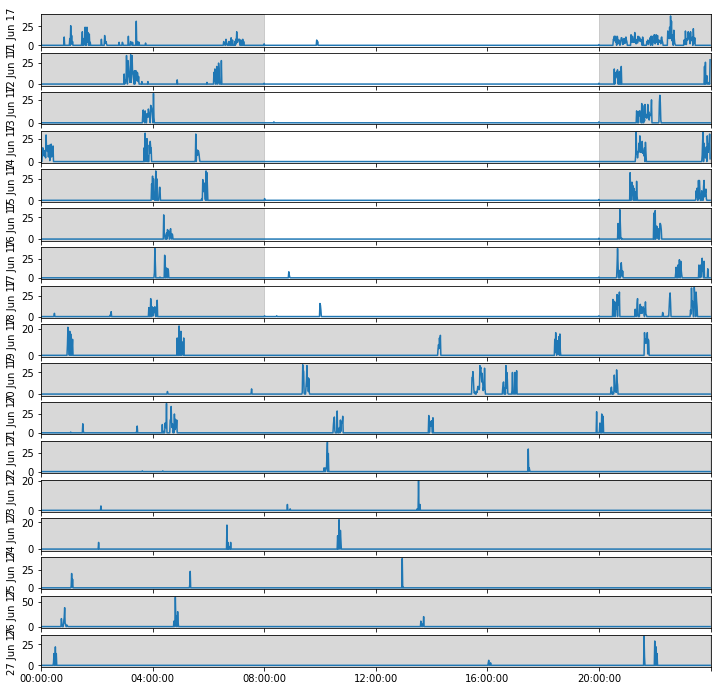

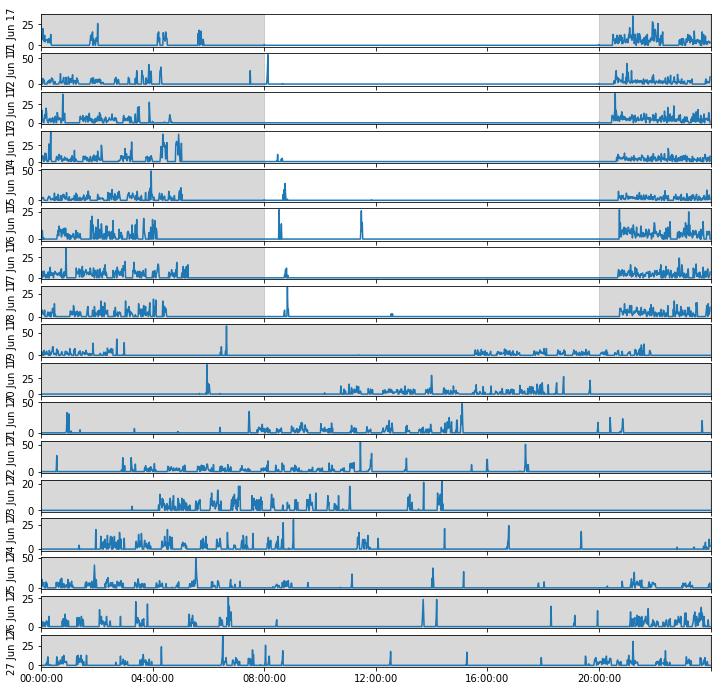

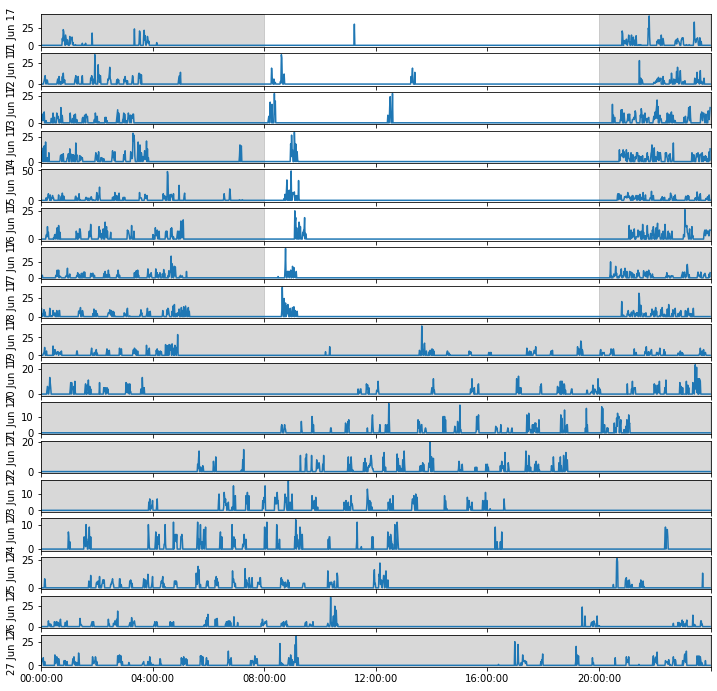

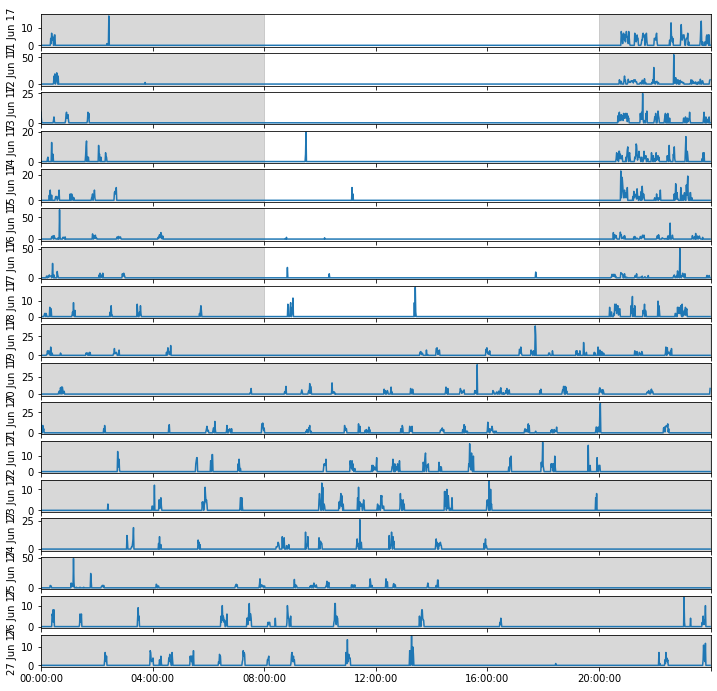

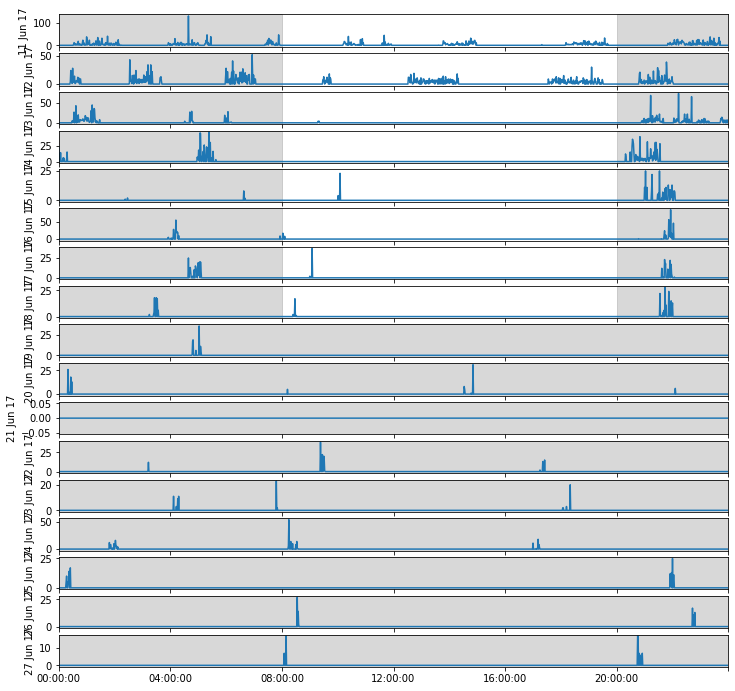

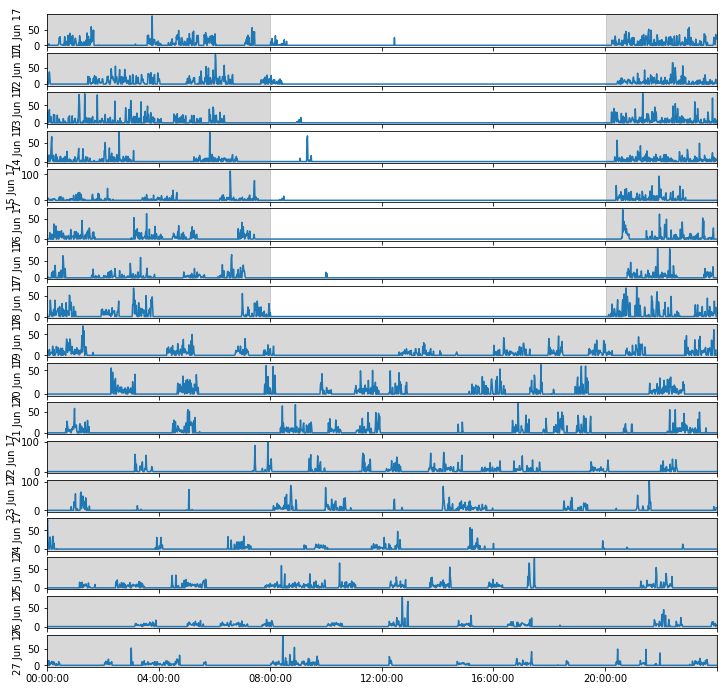

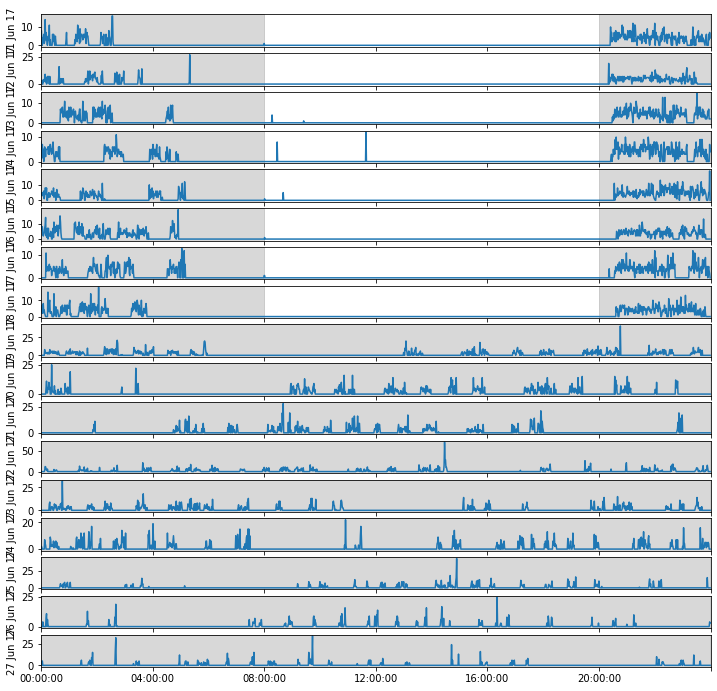

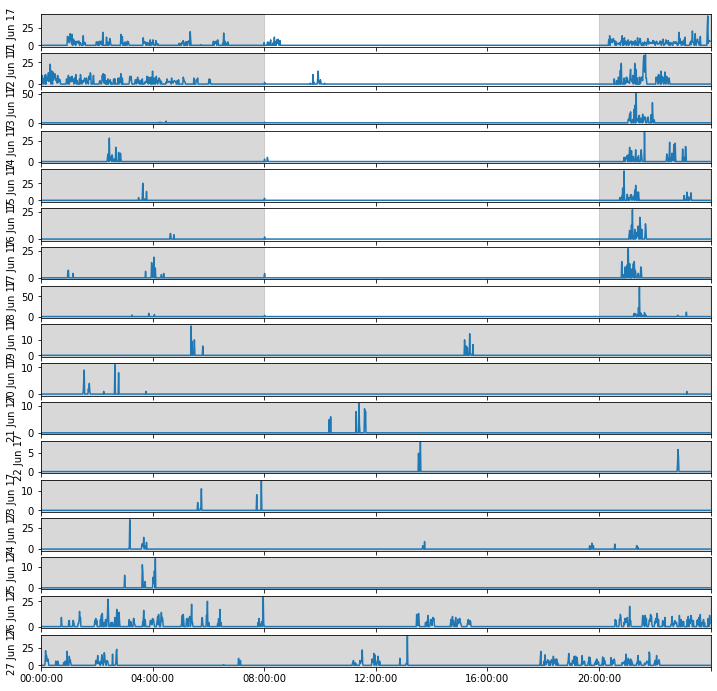

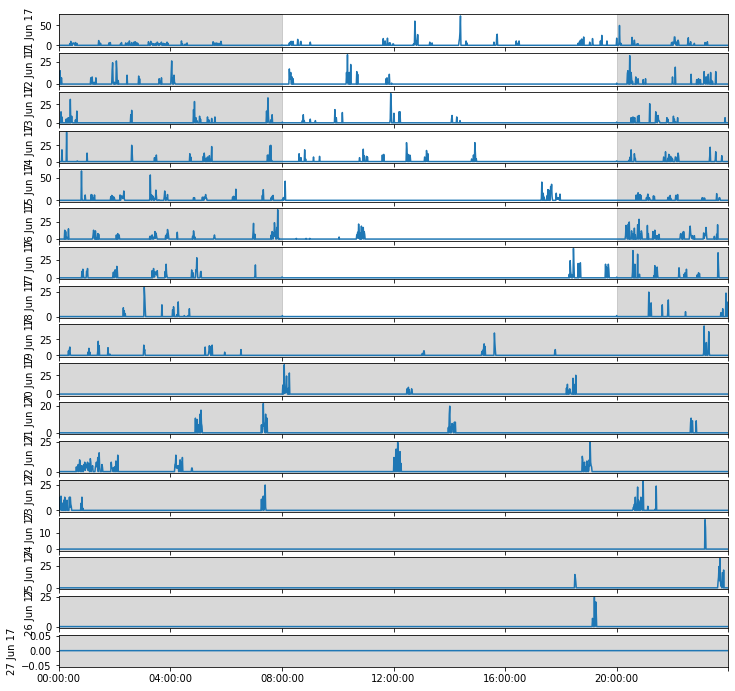

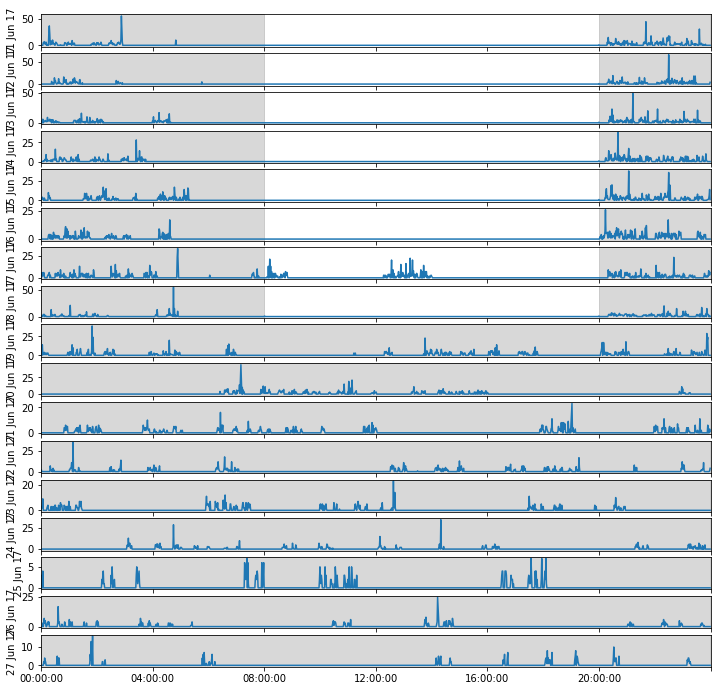

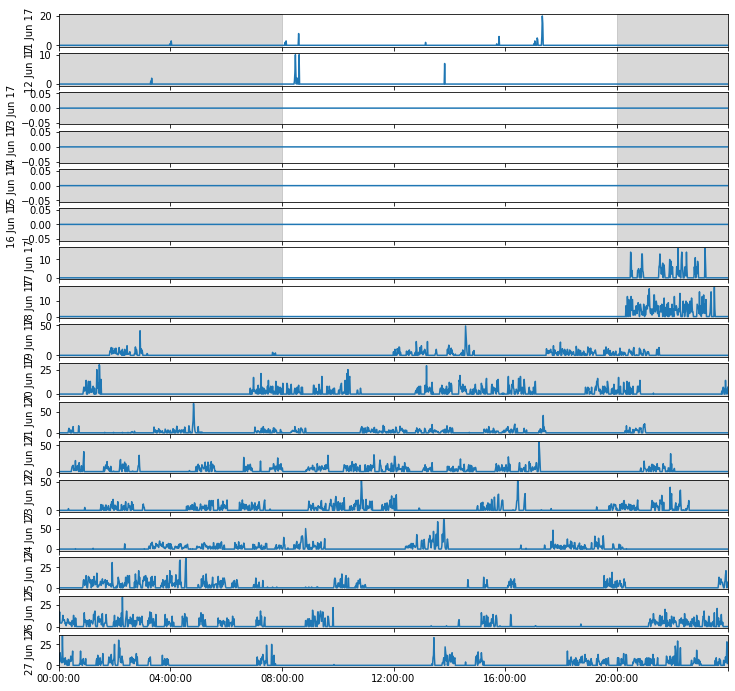

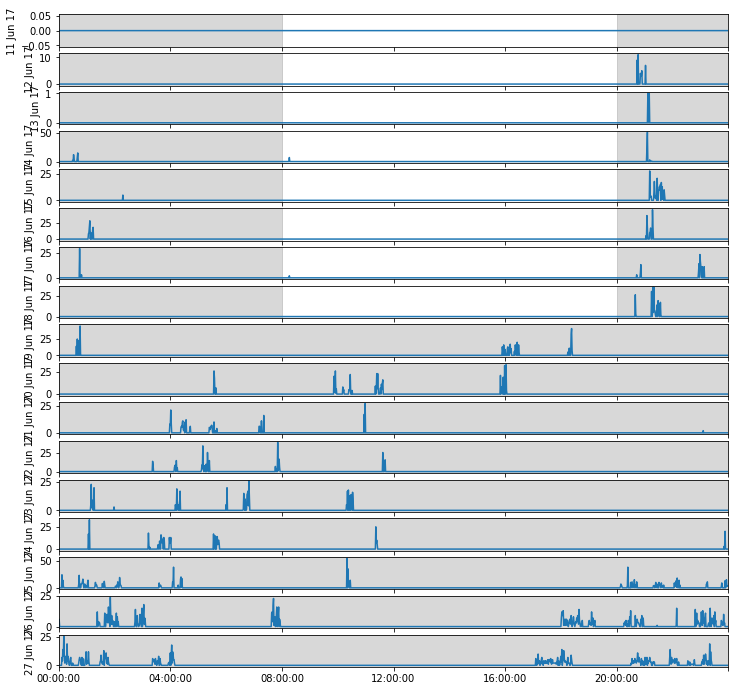

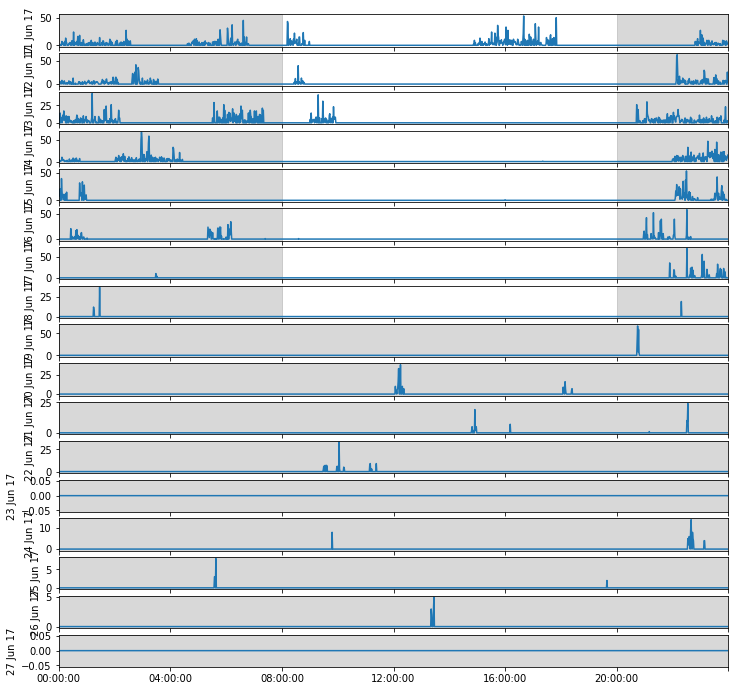

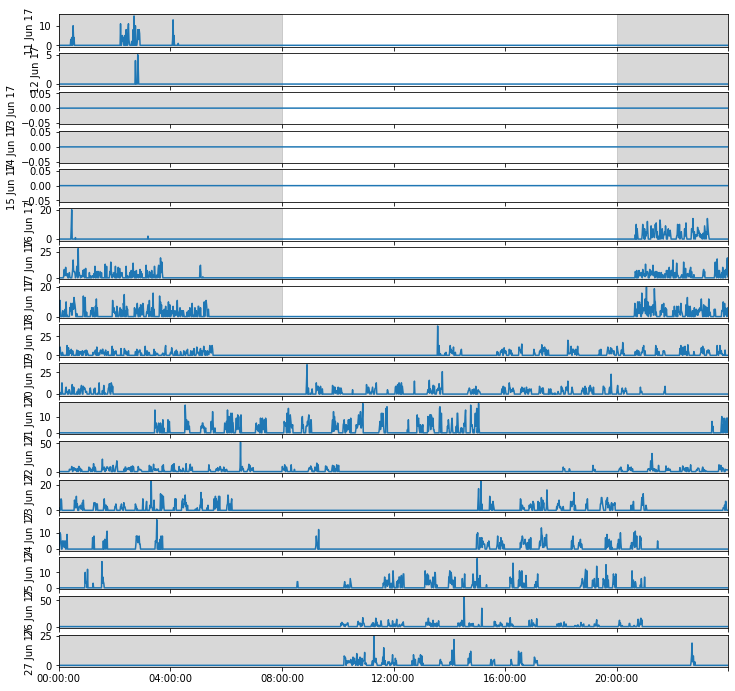

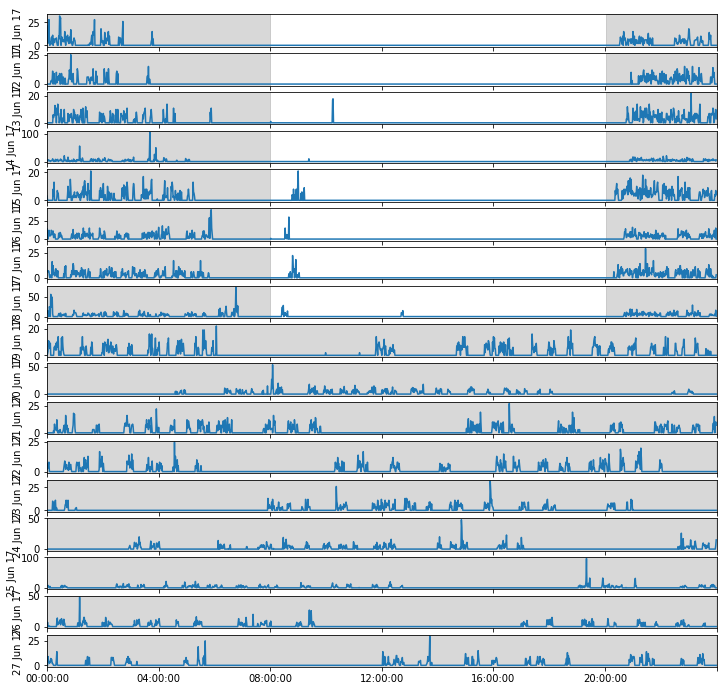

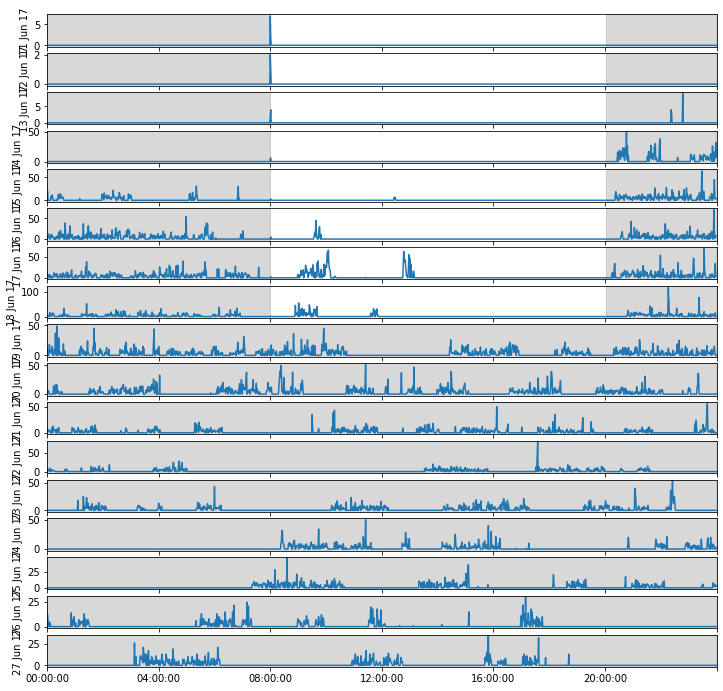

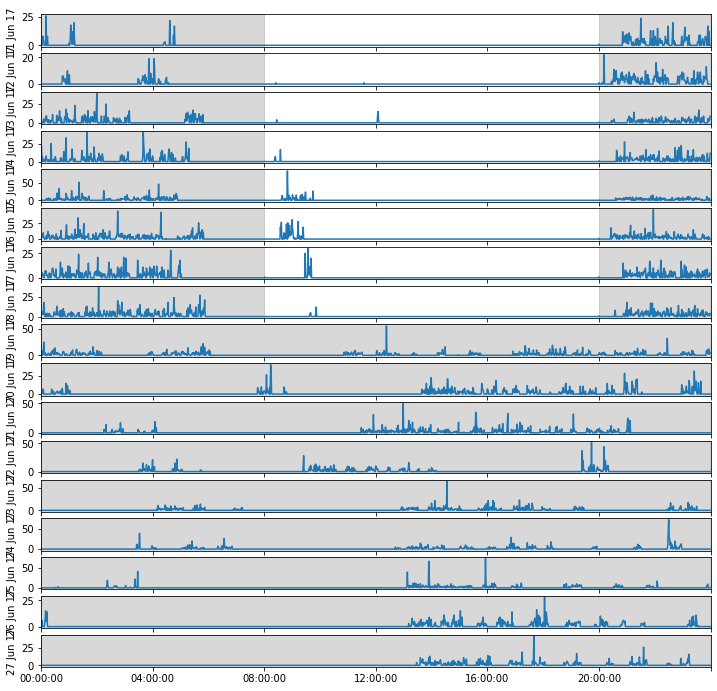

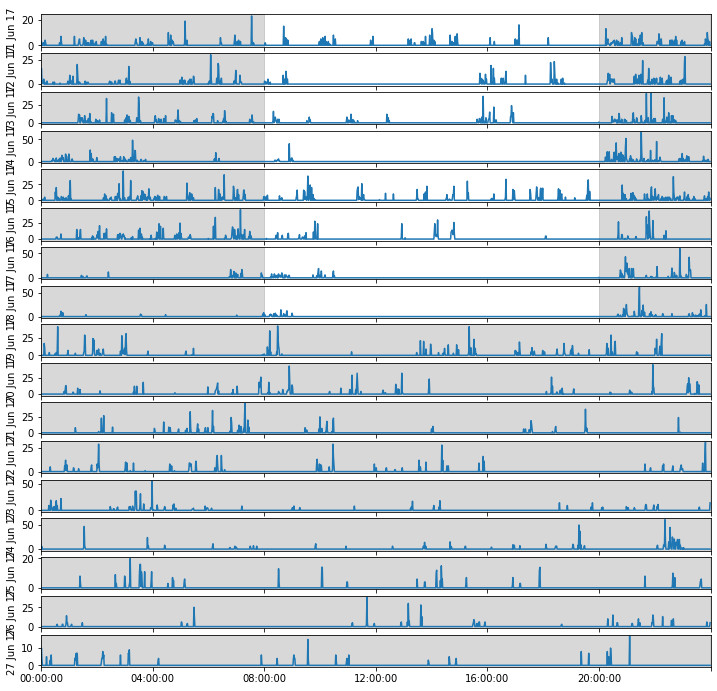

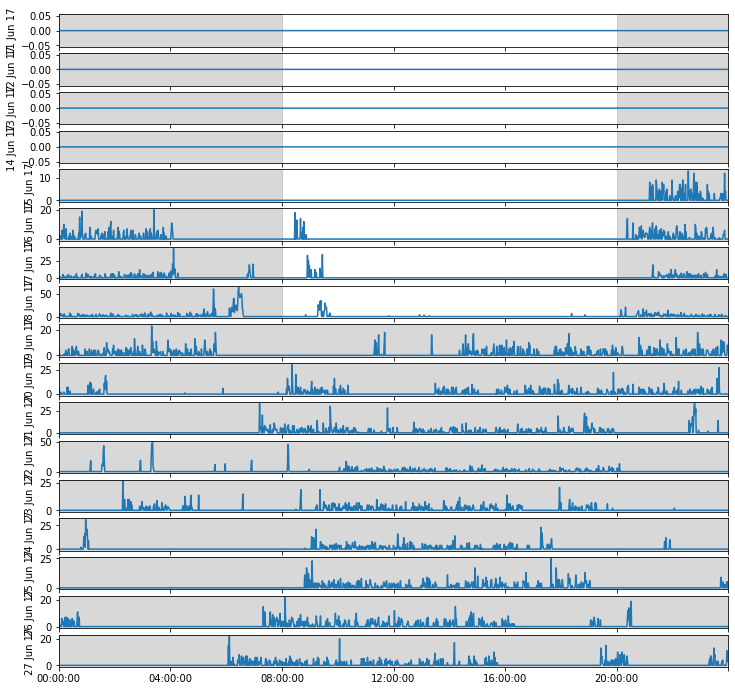

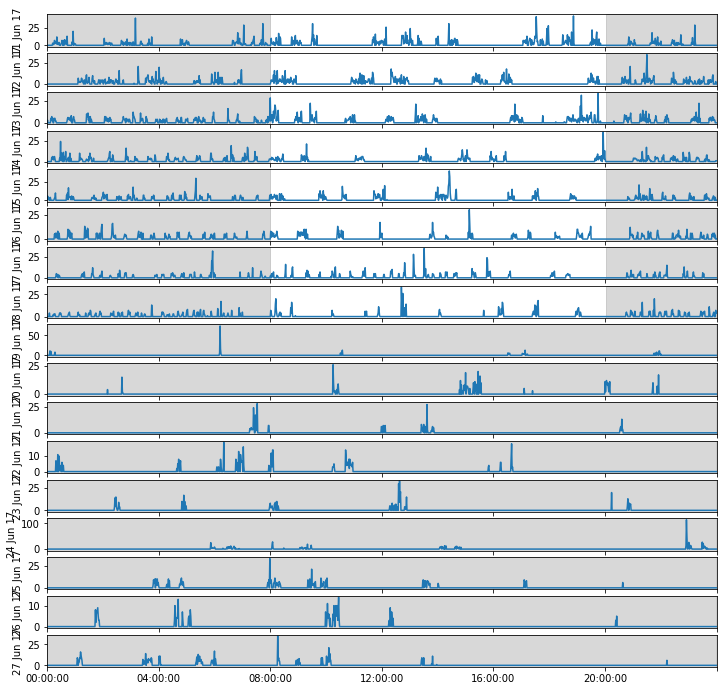

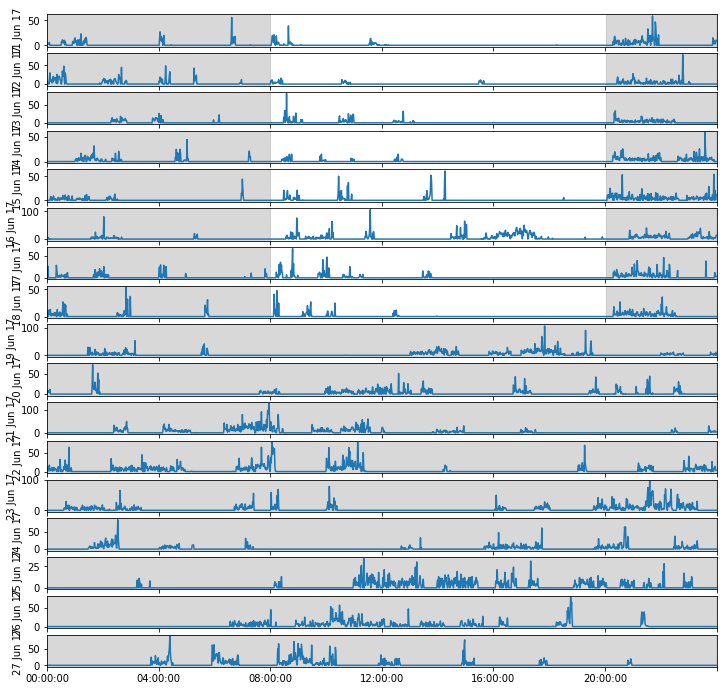

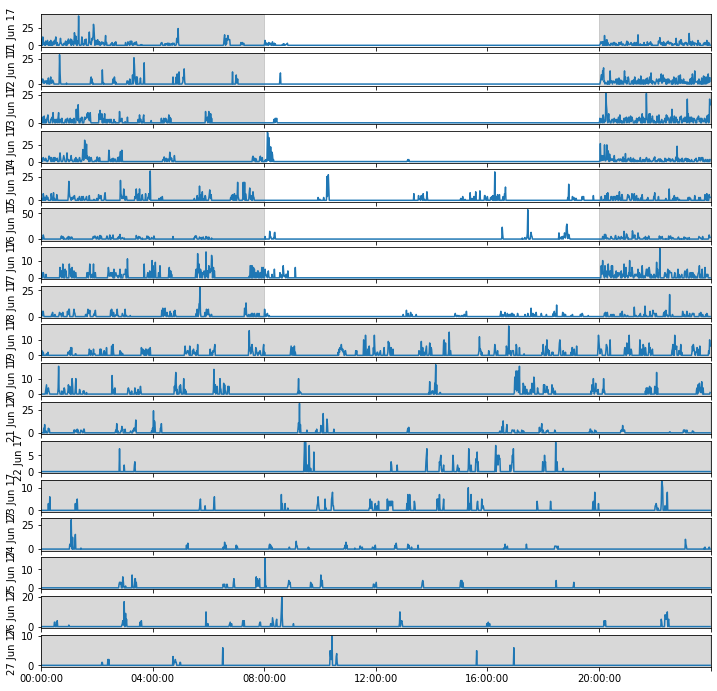

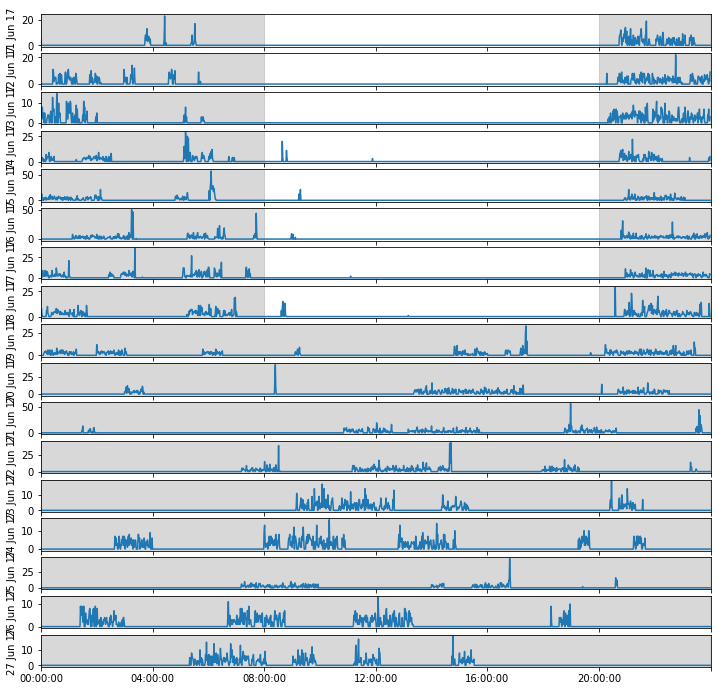

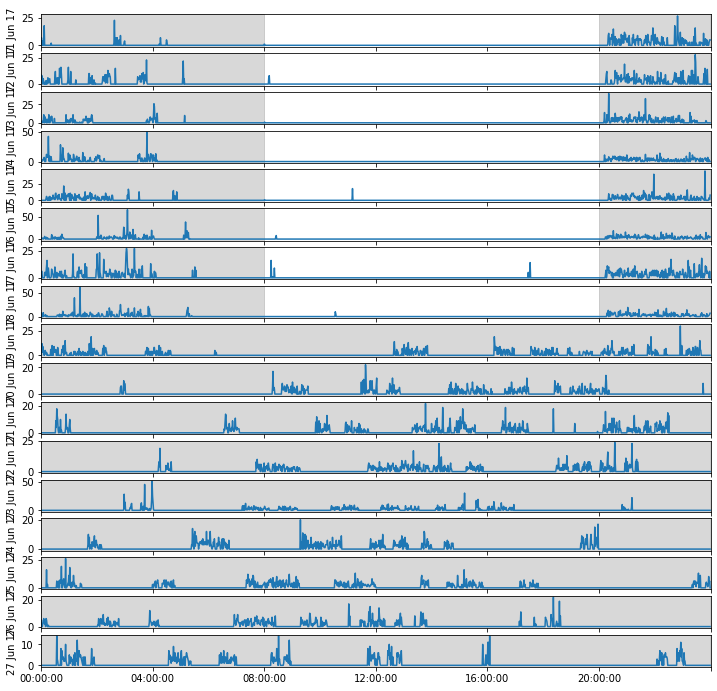

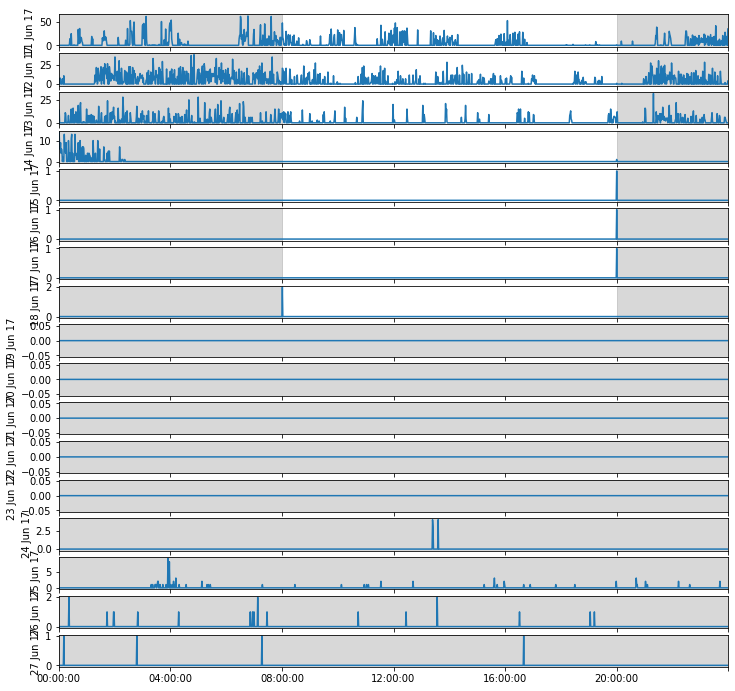

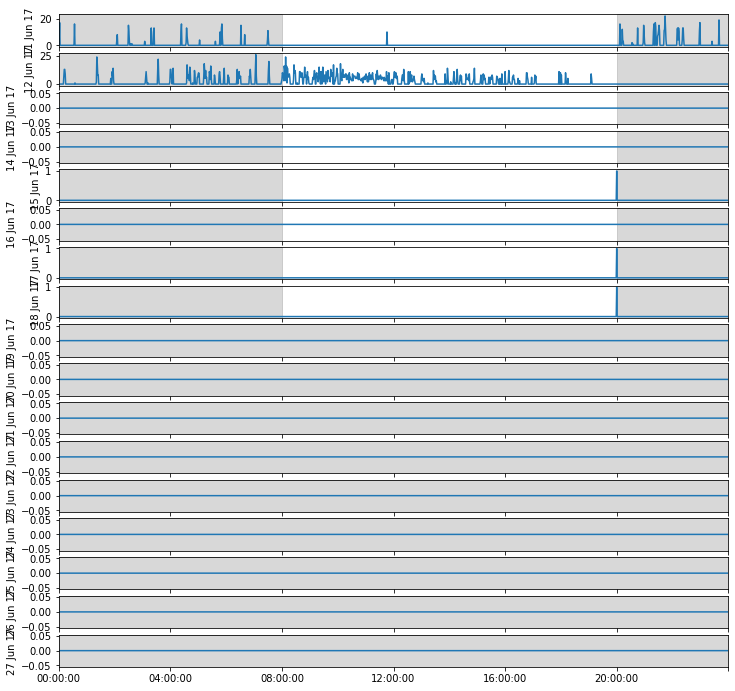

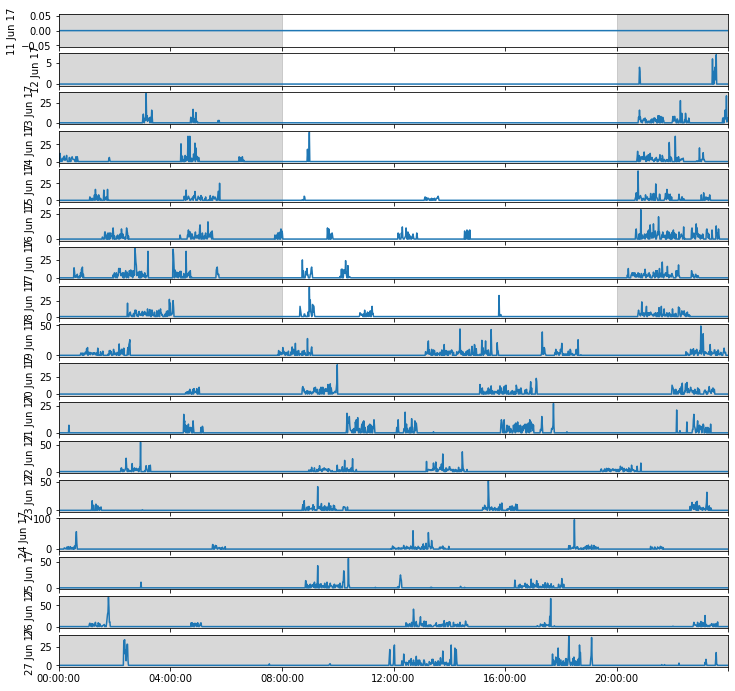

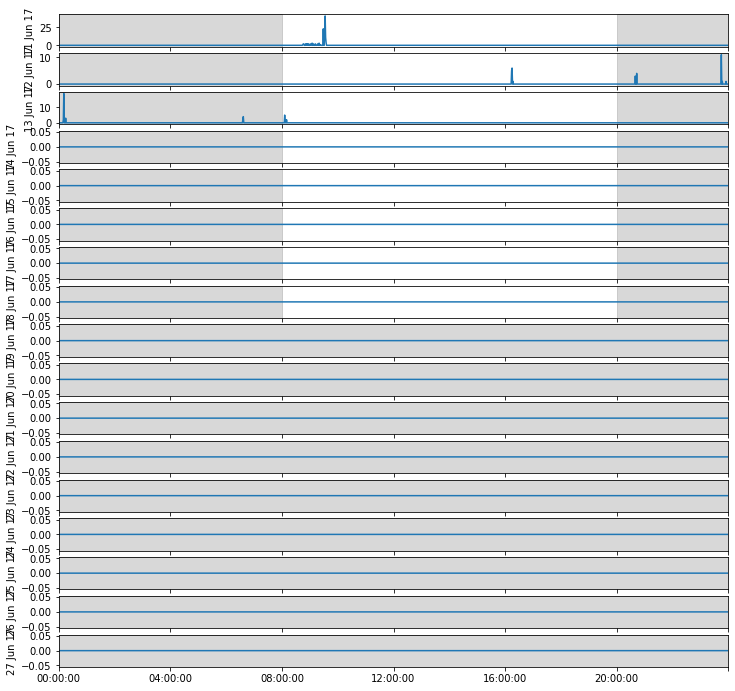

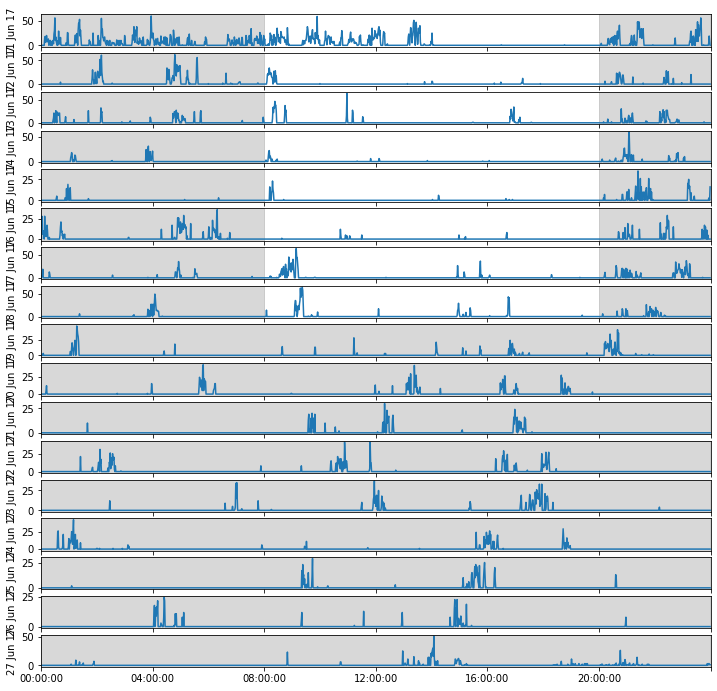

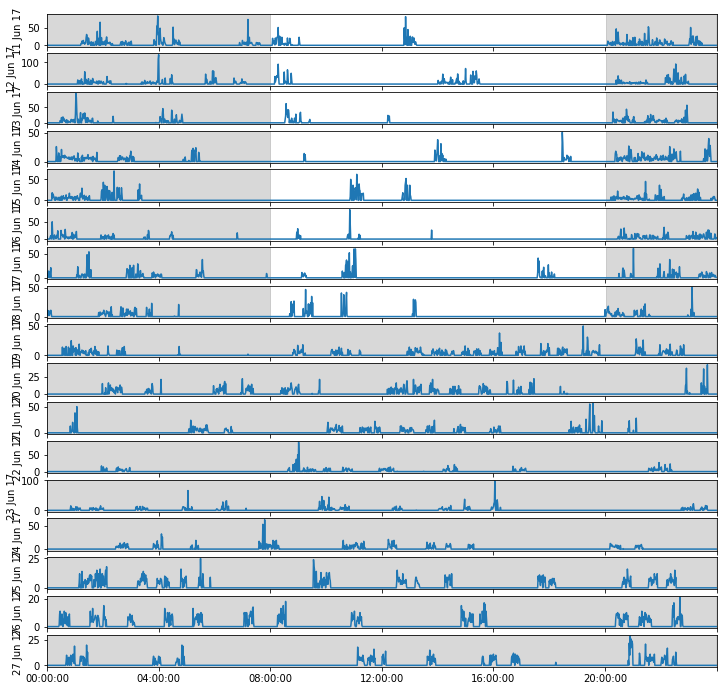

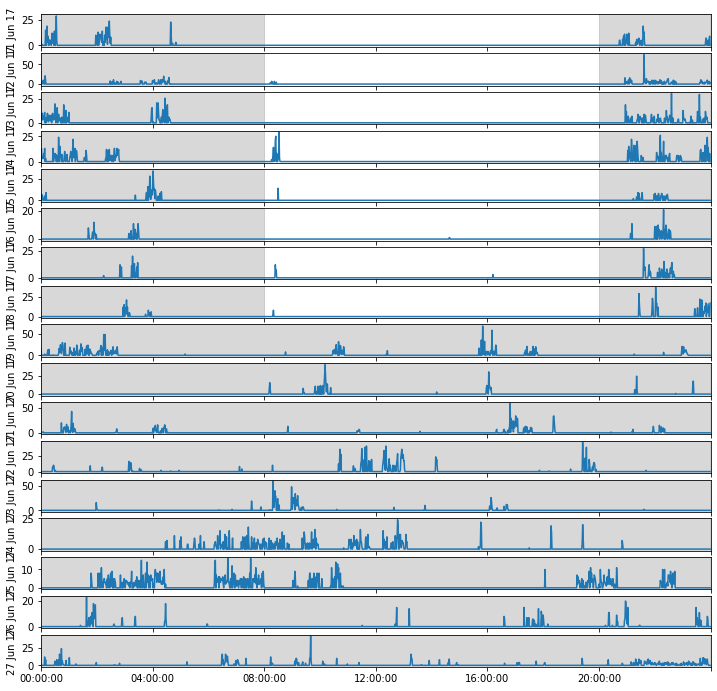

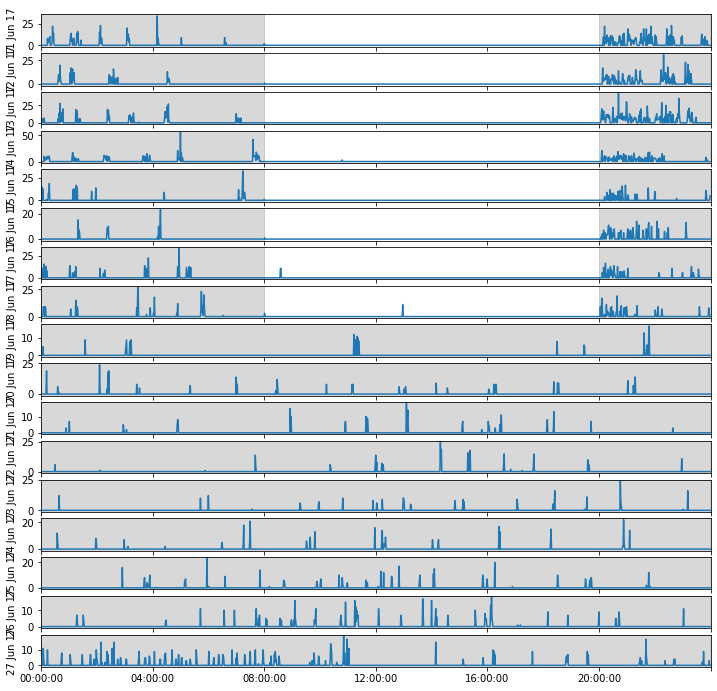

In [5]:
#Run through list of spiders and make raster plots for each and save the plot as .png file
for i in range(1,33):
    spider='s'+str(i)
    file_name='Full_Raster_Plots/'+'s'+str(i)+'_RasterPlot.png'
    Plot_RasterPlot(df,spider,file_name)

## Delete "unhealthy" subjects

In [67]:
#Create a .csc file to record the result of each spider's liveness after visual inspection
headers=['Alive']
spider=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17',
        's18','s19','s20','s21','s22','s23','s24','s25','s26','s27','s28','s29','s30','s31','s32']
Inspection=pd.DataFrame(columns=headers,index=spider)
Inspection.to_csv("Alive.csv") 

In [16]:
#Delete unhealthy spiders after the visual inspection of the full raster plots
#The specific names for "unhealthy" subjects is obtained by visual inspection
df_alive=pd.read_csv('Alive.csv')
df_alive.set_index('ID',inplace=True)

#Save the dead spiders' id name into a list
dead_spider=df_alive[df_alive['Alive']==0].index.tolist()

#delete the dead spiders' data in df
for t in dead_spider:
    del df[t]

df.head()

Date     Time lights  s1 s2 s3 s4 s5 s6 s7  ... s15  \
2017-09-22 00:00:00  22-Sep-17  0:00:00      0  15  0  0  0  0  0  8  ...  19   
2017-09-22 00:01:00  22-Sep-17  0:01:00      0   0  0  0  0  0  0  3  ...   3   
2017-09-22 00:02:00  22-Sep-17  0:02:00      0   0  0  0  0  0  0  6  ...  13   
2017-09-22 00:03:00  22-Sep-17  0:03:00      0   2  0  0  0  0  0  7  ...   6   
2017-09-22 00:04:00  22-Sep-17  0:04:00      0   3  0  0  0  0  0  8  ...   4   

                    s16 s17 s18 s19 s21 s22 s25 s27 s30  
2017-09-22 00:00:00   0  22   0   0   0   0   0   0  43  
2017-09-22 00:01:00   0  19   0   1   0   0   0   0  50  
2017-09-22 00:02:00   0  13   0  19   0   0   0   0  55  
2017-09-22 00:03:00   0  14   0   3   0   0   0   0  52  
2017-09-22 00:04:00   0   9   0   8   0   0   0   0  57  

[5 rows x 25 columns]

## Split data into two dataframes--light-dark period and constant dark period

In [65]:
#Split the data into two dataframes--LD (light-dark), DD (dark-dark)
LD,DD=Split_LD_DD(df)

#Save the LD, DD dataframe in two .csv files for future use
LD.to_csv('LD.csv')
DD.to_csv('DD.csv')

LD.head()
DD.head()

Date     Time  lights  s1  s2  s3  s4  s5  s6  s7  \
2017-09-30 00:00:00  30-Sep-17  0:00:00       0   0   8   0   0   0   0   2   
2017-09-30 00:01:00  30-Sep-17  0:01:00       0   0   0   0   0   9   0  11   
2017-09-30 00:02:00  30-Sep-17  0:02:00       0   0  13   0   0   0   0   5   
2017-09-30 00:03:00  30-Sep-17  0:03:00       0   0   8   0   0   4   0   9   
2017-09-30 00:04:00  30-Sep-17  0:04:00       0   0   0   0   0  11   0   2   

                     ...  s23  s24  s25  s26  s27  s28  s29  s30  s31  s32  
2017-09-30 00:00:00  ...    0    0    0    0    0    0    0   40    0    0  
2017-09-30 00:01:00  ...    0    0    0    0    0    0    0   43    0    0  
2017-09-30 00:02:00  ...    0    0    9    0    0    0    0   51    0    0  
2017-09-30 00:03:00  ...    0    0    4    0    0    0    0   38    0    0  
2017-09-30 00:04:00  ...    0    0    2    0    0    0    0   46    0    0  

[5 rows x 35 columns]